# **Organización de Datos 75.06 - Trabajo Práctico N°1**
V4. Reproduzca exactamente esta visualización

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

peliculas = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TP1/csv/movies.csv')

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
pelis_limpio = peliculas[ ['title', 'genres'] ].fillna('')
pelis_limpio.genres = pelis_limpio.genres.map(lambda x : x.split(','))
pelis_limpio_expandida = pelis_limpio.explode('genres')

traduccion = {'Crime':'Crimen', 'Mystery':'Misterio', 'Thriller':'Suspenso', 'Horror':'Horror', 'Fantasy':'Fantasía', 'Animation':'Animación', 'Science Fiction':'Ciencia Ficción', 'Action':'Acción', 'Adventure':'Aventura', 'Documentary':'Documental', 'Music':'Musical', 'Comedy':'Comedia', 'Drama':'Drama', 'Romance':'Romance'}

for genero in traduccion:
  pelis_limpio[traduccion[genero]] = pelis_limpio['genres'].apply(lambda x : x.count(genero))

corr_generos = pelis_limpio.corr()
corr_generos[corr_generos.select_dtypes(include=['number']).columns] *= 100
corr_generos = corr_generos.round().astype(int)

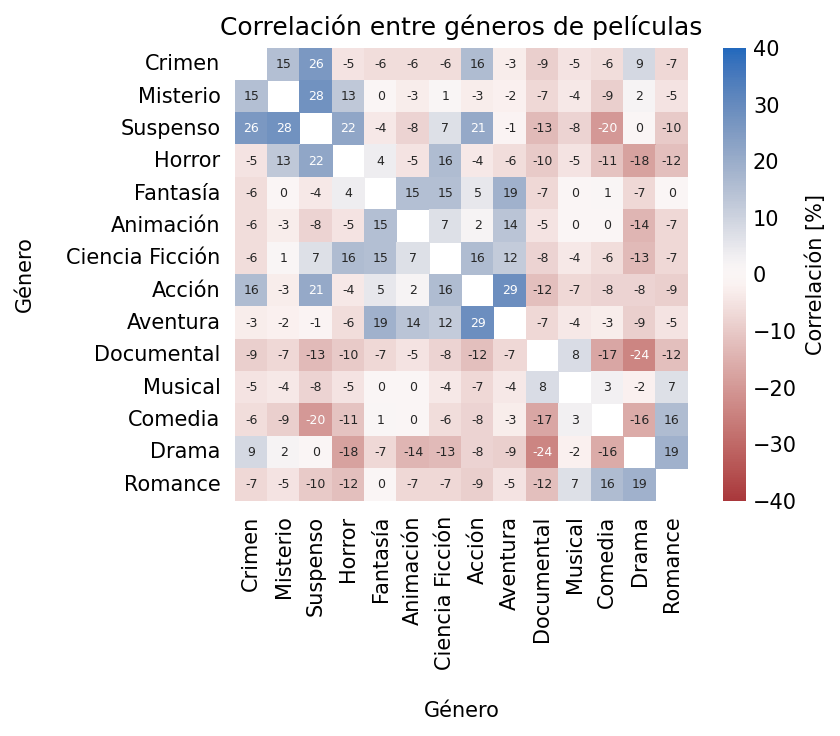

In [3]:
plt.figure(dpi=150)
grafico = sns.heatmap(corr_generos, vmin=-40, vmax=40, annot=True, square=True, mask=(corr_generos==100), annot_kws={'size':6}, cbar_kws={ 'label' : 'Correlación [%]'}, cmap=sns.color_palette('vlag_r', as_cmap=True))
plt.title('Correlación entre géneros de películas')
plt.xlabel('Género', labelpad=15)
plt.ylabel('Género', labelpad=15)
grafico.tick_params(left=False, bottom=False)
cbar = grafico.collections[0].colorbar
cbar.ax.tick_params(size=0)